In [1]:
cd("/home/jm2386/Active_Lattice/")
using DrWatson
@quickactivate "Active_Lattice"
include("/home/jm2386/Active_Lattice/src/pm_pdes.jl");
include("/home/jm2386/Active_Lattice/src/pm_sims.jl");
include("/home/jm2386/Active_Lattice/src/pm_plot.jl");
include("/home/jm2386/Active_Lattice/src/Hetrocline.jl");


v3.0
v4.0


In [35]:
Lx,Nx,ϕa,ϕp,v0 = 50.0, 3200, 0.5, 0.3, 7.5
# param, ps = get_param_full(Lx,Nx,ϕa,ϕp,v0)
f,u,c = load_full(Lx,Nx,ϕa,ϕp,v0)
# f,u,c = solve_full(Lx,Nx,ϕa,ϕp,v0,u; tol = 1e-8)
err, erri, avmag, cep = check_u_full(u,ps);
print("ϕa,ϕp=($(ϕa),$(ϕp)): cep =$(cep), avmag=$(avmag), err=$(err),$(erri)")

ϕa,ϕp=(0.5,0.3): cep =1.1238996279183741e-5, avmag=6.938893903907228e-17, err=0.008914802858759226,4723

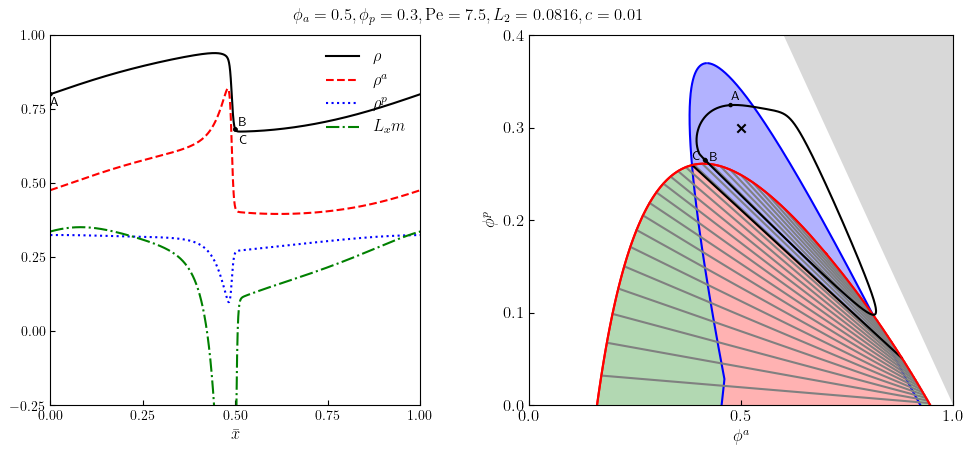

In [5]:
using PyPlot, LaTeXStrings
fig, axs = subplots(1,2,figsize=(10,5))
rc("text", usetex=true)
show_f(axs,fig,12,param,f; c=c)

In [46]:
stretch_param(param,42.5);

using NonlinearSolve, DifferentialEquations
prob = NonlinearProblem(ff,u0, ps; abstol = 1e-8, reltol =  1e-8);

sol  = solve(prob)
        u = sol.u
        f = get_f(u)
        c = u[end]
        filename    = steady_save_name(param)
        data        = Dict("f" => f, "c" => c)
        safesave(filename,data)

In [32]:
function save_name_full(param)
    @unpack DT, v0, DR, Nx, Lx, name, ϕa, ϕp = param
    return "/store/DAMTP/jm2386/Active_Lattice/data/pm_pdes_pro/full_sol/$(name)/[DT,v0,DR,Lx,Nx,ϕa,ϕp]=$([DT,v0,DR,Lx,Nx,ϕa,ϕp]).jld2"
end

save_name_full (generic function with 1 method)

In [9]:
input = 1

ϕa = 0.5
ϕp = 0.3
ϕa_end = [0.5, 0.0, 0.69][input]
ϕp_end = [0.0, 0.3, 0.30][input]
Lx     = [100.0][1] #[input]

Lx, Nx, ϕa, ϕp, v0 = Lx, 3200, ϕa, ϕp, 7.5

steps = Int64(max(abs(ϕa_end-ϕa)÷0.005,abs(ϕp_end-ϕp)÷0.005))

Δa = (ϕa_end-ϕa)/steps
Δp = (ϕp_end-ϕp)/steps

if Δa == 0.0
    ϕa_sweep = fill(ϕa,steps)
else
    ϕa_sweep = (ϕa+Δa):Δa:ϕa_end;
end

if Δp == 0.0
    ϕp_sweep = fill(ϕp,steps)
else
    ϕp_sweep = (ϕp+Δp):Δp:ϕp_end;
end

sweep = (Lx, Nx, ϕa, ϕp, v0)
param_sweep = [(Lx, Nx, d4(ϕa), d4(ϕp), v0) for (ϕa,ϕp) in zip(ϕa_sweep,ϕp_sweep)];

f,u,c = load_full(sweep...)
param, ps = get_param_full(sweep...)
# f,u,c = solve_full(Lx,Nx,ϕa,ϕp,v0,u; tol = 1e-10)
err, erri, avmag, c = check_u_full(u,ps);
println("ϕa,ϕp=($(ϕa),$(ϕp)): c=$(c), avmag=$(avmag), err=$(err)")

ϕa,ϕp=(0.5,0.3): c=0.014360907985359739, avmag=6.938893903907228e-17, err=2.7127272650417922e-11


In [41]:
sweep = param_sweep[1]
param, ps = get_param_full(sweep...)
# f,u,c = solve_full(Lx,Nx,ϕa,ϕp,v0,u; tol = 1e-10)
err, erri, avmag, c = check_u_full(u,ps);
println("ϕa,ϕp=($(ϕa),$(ϕp)): c=$(c), avmag=$(avmag), err=$(err)")

ϕa,ϕp=(0.5,0.3): c=0.014360907985359739, avmag=6.938893903907228e-17, err=0.0051000000000006596


In [43]:
for sweep in param_sweep
    local Lx, Nx, ϕa, ϕp, v0, param
    global f,u,c
        Lx, Nx, ϕa, ϕp, v0 = sweep
        param, ps = get_param_full(sweep...)
        f,u,c = solve_full(Lx,Nx,ϕa,ϕp,v0,u)
        err, avmag, c = check_u_full(u,ps);
        println("ϕa,ϕp=($(ϕa),$(ϕp)): c=$(c), avmag=$(avmag), err=$(err)")
end

In [47]:
ϕa = 0.5
ϕp = 0.3
Lx, Nx, ϕa, ϕp, v0 = 100.0, 3200, ϕa, ϕp, 7.5

runs = []

for ϕa in 0.3:0.0001:0.6
    try 
        sweep = (Lx, Nx, ϕa, ϕp, v0)
        f,u,c = load_full(sweep...)
        append!(runs,ϕa)
    catch
    end
end

ϕa_low = runs[1];
ϕa_hih = runs[end];

ϕa_low, ϕa_hih

(0.3384, 0.587)

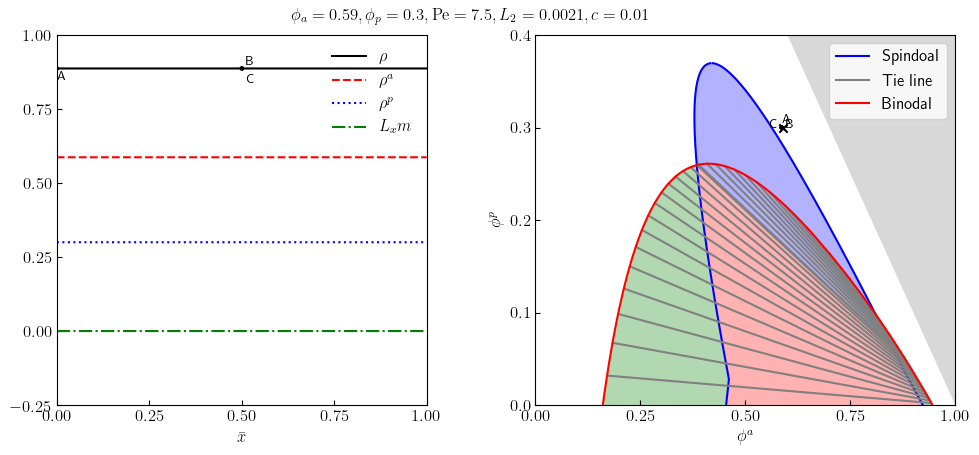

In [10]:
f,u,c = load_full(Lx, Nx, ϕa_hih, ϕp, v0)
using PyPlot, LaTeXStrings
fig, axs = subplots(1,2,figsize=(10,5))
rc("text", usetex=true)
show_f(axs,fig,12,param,f; c=c)

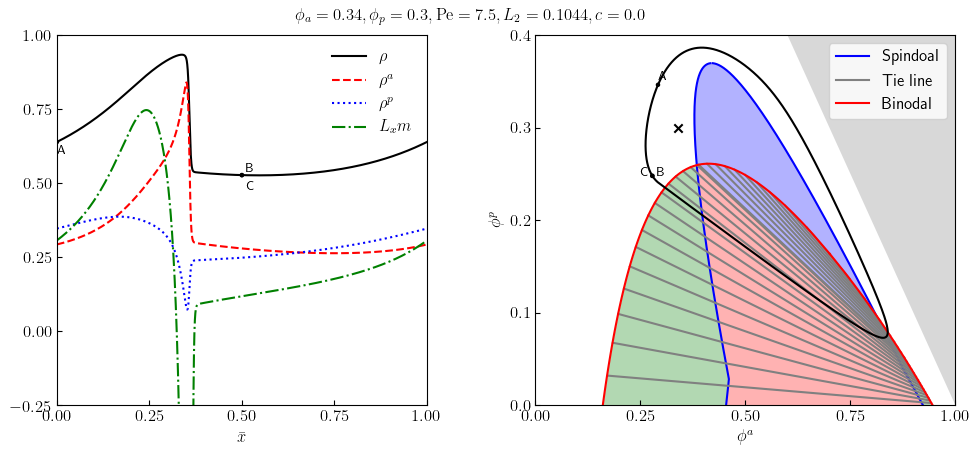

In [11]:
f,u,c = load_full(Lx, Nx, ϕa_low, ϕp, v0)
using PyPlot, LaTeXStrings
fig, axs = subplots(1,2,figsize=(10,5))
rc("text", usetex=true)
show_f(axs,fig,12,param,f; c=c)

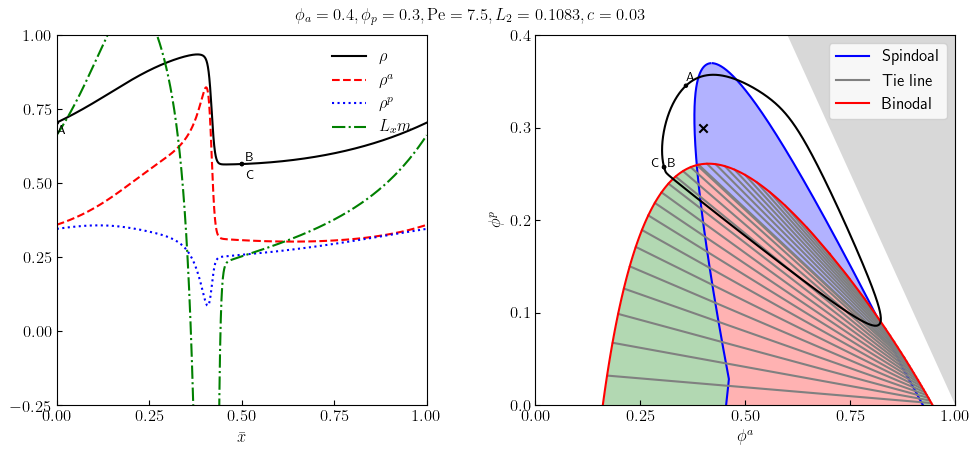

In [25]:
f,u,c = load_full(Lx, Nx, ϕa_low, ϕp, v0)
using PyPlot, LaTeXStrings
fig, axs = subplots(1,2,figsize=(10,5))
rc("text", usetex=true)
show_f(axs,fig,12,param,f; c=c)

In [23]:
ϕa = 0.5
ϕp = 0.3
Lx, Nx, ϕa, ϕp, v0 = 100.0, 3200, ϕa, ϕp, 7.5

runs = []

for ϕp in 0.2:0.0001:0.4
    try 
        sweep = (Lx, Nx, ϕa, ϕp, v0)
        f,u,c = load_full(sweep...)
        append!(runs,ϕa)
    catch
    end
end

ϕp_low = runs[1];
ϕp_hih = runs[end];

ϕp_low, ϕp_hih

(0.5, 0.5)

In [44]:
ϕa = 0.34
ϕp = 0.3
Lx, Nx, ϕa, ϕp, v0 = 100.0, 3200, ϕa, ϕp, 7.5

ϕa_load = 0.0
for ϕa in (ϕa-0.004):0.0001:(ϕa+0.005)
    try 
        ϕa = d4(ϕa)
        sweep = (Lx, Nx, ϕa, ϕp, v0)
        f,u,c = load_full(sweep...)
        ϕa_load = ϕa
        break
    catch
    end
end

ϕa_load, ϕp

(0.3384, 0.3)

In [75]:
input = 25

ϕa = d2.(collect(0.34:0.01:0.59))[input] #26
ϕp = 0.3

Lx, Nx, ϕa, ϕp, v0 = 100.0, 3200, ϕa, ϕp, 7.5

ϕp_sweep = d2.(collect(0.3:(-0.01):0.0))
ϕa_sweep = fill(ϕa,length(ϕp_sweep))

sweep = (Lx, Nx, ϕa, ϕp, v0)
param_sweep = [(Lx, Nx, d2(ϕa), d2(ϕp), v0) for (ϕa,ϕp) in zip(ϕa_sweep,ϕp_sweep)];

f,u,c = 0, 0, 0
for ϕa in (ϕa-0.004):0.0001:(ϕa+0.005)
    try 
        ϕa = d4(ϕa)
        sweep = (Lx, Nx, ϕa, ϕp, v0)
        f,u,c = load_full(sweep...)
        # ϕa_load = ϕa
        break
    catch
    end
end

# sweep = (Lx, Nx, ϕa, ϕp, v0)
param, ps = get_param_full(sweep...)
err, erri, avmag, c = check_u_full(u,ps);
if err>1e-6
    c = c*Lx
    u[end] = u[end]*Lx
end

err, erri, avmag, c = check_u_full(u,ps);
println("ϕa,ϕp=($(ϕa),$(ϕp)): c=$(c), avmag=$(avmag), err=$(err),$(erri)")

ϕa,ϕp=(0.58,0.3): c=0.012153261076909356, avmag=-2.0816681711721685e-17, err=2.2409768485331938e-11,7482


In [8]:
Lx, Nx, ϕa, ϕp, v0 = 100.0, 3200, 0.5, 0.3, 7.5
xs = []
ys = []
ϵ = 1e-4
for ϕa in 0.1:0.01:0.6
for ϕp in 0.0:0.01:0.4
    try 
        sweep = (Lx, Nx, ϕa, ϕp, v0)
        f,u,c = load_full(sweep...)
        normf = sqrt(sum( (f[:,1] .- ϕa/2).^2 + (f[:,2] .- ϕa/2).^2 + (f[:,3] .- ϕp).^2)/Nx)
        if normf > ϵ
            push!(xs, ϕa)
            push!(ys, ϕp)
        end
    catch
    end
end
end

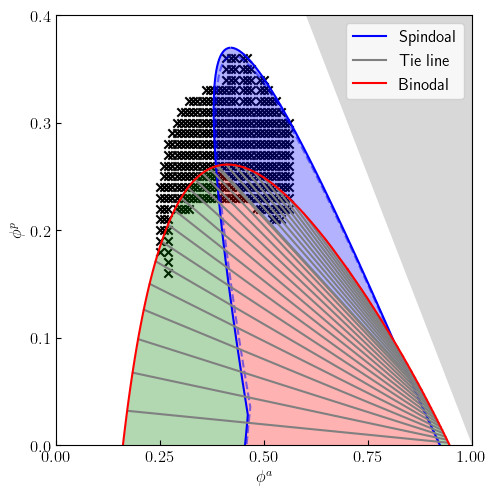

In [9]:
using PyPlot, LaTeXStrings
fig, ax = subplots(1,1,figsize=(5,5))
ax.scatter(xs,ys; color = "black", marker = "x")
plot_phase(fig, ax, v0, 12; Lxs = [10])
display(fig)

In [19]:
i = argmax(ys)

2.0057489041978075e-8

In [27]:
sweep = Lx, Nx, ϕa, ϕp, v0 = 100.0, 3200, 0.28, 0.29, 7.5
param, ps = get_param_full(sweep...)
f,u,c = load_full(sweep...)
using PyPlot, LaTeXStrings
fig, axs = subplots(1,2,figsize=(10,5))
rc("text", usetex=true)
show_f(axs,fig,12,param,f; c=c)
err, erri, avmag, c = check_u_full(u,ps);
println("ϕa,ϕp=($(ϕa),$(ϕp)): c=$(c), avmag=$(avmag), err=$(err) ($(erri))")

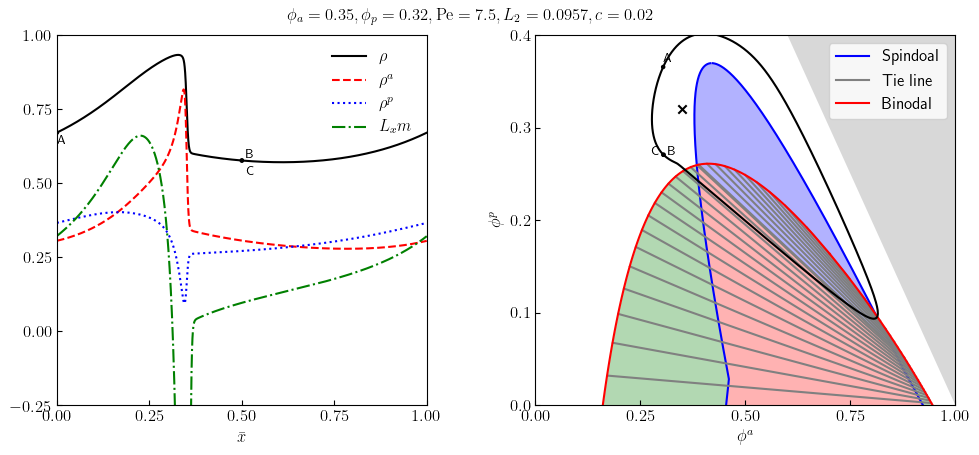

ϕa,ϕp=(0.35,0.32): c=0.023461782564691412, avmag=-8.326672684688674e-17, err=6.191741563910114e-10 (7527)


In [96]:
sweep = Lx, Nx, ϕa, ϕp, v0 = 100.0, 3200, 0.35, 0.32, 7.5
param, ps = get_param_full(sweep...)
f,u,c = load_full(sweep...)
using PyPlot, LaTeXStrings
fig, axs = subplots(1,2,figsize=(10,5))
rc("text", usetex=true)
show_f(axs,fig,12,param,f; c=c)
err, erri, avmag, c = check_u_full(u,ps);
println("ϕa,ϕp=($(ϕa),$(ϕp)): c=$(c), avmag=$(avmag), err=$(err) ($(erri))")

In [121]:
ρ = sum(f;dims = 2)[:,1]
ϕ = mean(ρ)
i = argmax(ρ)
f = circshift(f,(-i,0))
ρ = circshift(ρ,-i)
# j = argmin(abs.(ρ.-ϕ))

3200-element Vector{Float64}:
 0.9328152617583062
 0.9328076974815424
 0.9327949233919918
 0.9327767508919191
 0.9327529795898408
 0.9327233961753749
 0.9326877731571324
 0.9326458674315078
 0.9325974186687853
 0.9325421474788532
 ⋮
 0.9326752975614084
 0.9327076617824266
 0.9327361171079711
 0.9327605467783301
 0.9327808282529138
 0.93279683278625
 0.9328084249592242
 0.9328154621625873
 0.9328177940212633

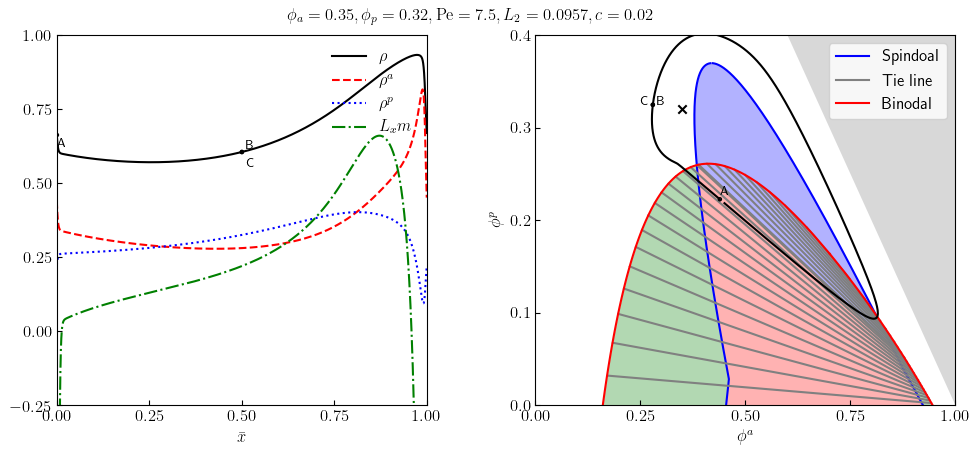

ϕa,ϕp=(0.35,0.32): c=0.023461782564691412, avmag=-4.85722573273506e-17, err=0.001005951785802095 (9601)


In [127]:
f,u,c = align_f(f,u,c)
using PyPlot, LaTeXStrings
fig, axs = subplots(1,2,figsize=(10,5))
rc("text", usetex=true)
show_f(axs,fig,12,param,f; c=c)
err, erri, avmag, c = check_u_full(u,ps);
println("ϕa,ϕp=($(ϕa),$(ϕp)): c=$(c), avmag=$(avmag), err=$(err) ($(erri))")

In [109]:
DT, v0, DR, Δx, Nx, Lx, ϕa, ϕp = ps
param, _ = get_param_full(Lx,Nx,ϕa,ϕp,v0)
F = zeros(3*Nx+1)
ff(F,u,ps)
F

9601-element Vector{Float64}:
 -7.86258558260755e-12
 -1.8774024002077283e-11
 -3.313153917883227e-11
 -5.1224080532819016e-11
 -7.301904914047697e-11
 -9.812525791907944e-11
 -1.256136167304689e-10
 -1.5394123475953592e-10
 -1.8089517384023424e-10
 -2.0364056274591036e-10
  ⋮
 -2.1368684599565313e-11
 -1.8182066963134957e-11
 -1.4457990360483564e-11
 -1.018274353725701e-11
 -5.3523296905666484e-12
 -1.1102230246251566e-18
 -1.1102230246251565e-16
 -5.551115123125783e-17
  0.24155743355047476

2100